In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Load training data
train_folder = "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment5_code/Group01_Assignment5_code/Data-2/BOVW/train"
train_data = []
train_labels = []

class_folders = os.listdir(train_folder)
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(train_folder, class_folder)
    files = os.listdir(class_path)

    for file in files:
        file_path = os.path.join(class_path, file)
        bovw_representation = np.load(file_path)
        train_data.append(bovw_representation)
        train_labels.append(i)

X_train = np.vstack(train_data)
y_train = np.array(train_labels)

# Load testing data
test_folder = "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment5_code/Group01_Assignment5_code/Data-2/BOVW/test"
test_data = []
test_labels = []

class_folders = os.listdir(test_folder)
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(test_folder, class_folder)
    files = os.listdir(class_path)

    for file in files:
        file_path = os.path.join(class_path, file)
        bovw_representation = np.load(file_path)
        test_data.append(bovw_representation)
        test_labels.append(i)

X_test = np.vstack(test_data)
y_test = np.array(test_labels)

# Perform PCA with different reduced dimensions
dimensions = [1, 2, 4, 8]

for l in dimensions:
    # PCA
    pca = PCA(n_components=l)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)

    # Train GMM with different mixture components
    for n_components in [1, 2, 4, 8]:
        #gmm = GaussianMixture(n_components=n_components, covariance_type='full',min_covar=0.0000001, random_state=42)
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X_train_reduced)

        # Predict on the test set
        y_pred = gmm.predict(X_test_reduced)
        print(y_pred)
        # Calculate classification metrics
        report = classification_report(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        # Print metrics
        print(f"Dimensionality: {l}, Components: {n_components}")
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", confusion)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Dimensionality: 1, Components: 1
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

Confusion Matrix:
 [[50  0  0]
 [50  0  0]
 [50  0  0]]
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

[0 0 6 6 0 6 0 0 0 0 0 4 0 2 2 4 0 0 0 0 4 6 6 6 6 0 6 6 6 6 4 6 4 4 4 0 0
 0 4 0 6 0 0 6 0 0 4 6 4 0 0 4 0 6 0 6 6 0 6 6 0 6 6 6 6 5 0 6 0 4 6 6 6 0
 6 4 6 6 0 6 4 6 4 6 5 6 0 0 4 6 0 6 4 0 4 6 2 4 2 0 0 4 0 0 4 5 0 5 0 4 0
 6 0 4 4 5 4 4 2 6 4 6 2 4 6 6 2 4 2 6 0 4 6 2 0 4 2 4 4 6 6 0 2 2 0 2 4 4
 5 4]
Dimensionality: 1, Components: 8
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47        50
           1       0.00      0.00      0.00        50
           2       0.69      0.18      0.29        50
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.21       150
   macro avg       0.20      0.11      0.13       150
weighted avg       0.39      0.21      0.25       150

Confusion Matrix:
 [[23  0  2 10  0 15]
 [14  0  2  9  2 23]
 [11  0  9 17  4  9]
 [ 0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[0 0 3 3 0 3 0 0 0 0 0 2 0 2 2 2 0 0 0 0 2 2 3 3 3 0 3 3 3 3 2 3 2 2 2 0 0
 0 2 0 3 0 0 3 0 0 2 3 3 0 0 2 0 3 0 0 3 0 3 3 0 3 3 3 3 2 0 3 0 2 3 3 3 0
 3 2 3 3 0 3 2 3 2 3 2 3 0 0 2 3 0 3 2 0 3 3 2 2 2 0 0 2 0 0 2 2 3 2 0 2 0
 3 0 2 2 1 2 2 2 3 2 0 2 2 3 3 2 2 2 3 0 2 3 2 0 2 2 2 2 3 3 0 2 2 0 2 2 2
 2 2]
Dimensionality: 2, Components: 4
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.46      0.46        50
           1       0.00      0.00      0.00        50
           2       0.55      0.58      0.56        50
           3       0.00      0.00      0.00         0

    accuracy                           0.35       150
   macro avg       0.25      0.26      0.26       150
weighted avg       0.34      0.35      0.34       150

Confusion Matrix:
 [[23  0 12 15]
 [15  0 12 23]
 [11  1 29  9]
 [ 0  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 0 4 4 0 4 0 0 0 0 0 5 0 2 2 5 0 0 0 0 2 5 4 4 4 0 6 4 4 4 5 4 6 6 5 0 0
 0 5 0 4 0 0 4 0 0 6 4 4 0 0 5 0 4 0 4 4 0 4 6 0 4 4 6 4 2 0 4 0 6 4 4 4 0
 4 5 4 4 0 4 4 6 6 4 2 4 0 0 4 4 0 4 4 0 4 4 2 6 2 0 0 6 0 0 4 5 4 2 0 6 0
 4 0 6 6 2 4 4 2 4 6 0 5 2 4 4 5 4 5 4 0 6 4 5 0 6 2 5 6 4 4 0 6 5 0 2 5 5
 2 5]
Dimensionality: 2, Components: 8
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47        50
           1       0.00      0.00      0.00        50
           2       0.50      0.14      0.22        50
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.20       150
   macro avg       0.16      0.10      0.11       150
weighted avg       0.33      0.20      0.23       150

Confusion Matrix:
 [[23  0  3 14  6  4]
 [14  0  4 24  2  6]
 [11  0  7 13 10  9]
 [ 0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Dimensionality: 4, Components: 4
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

Confusion Matrix:
 [[50  0  0]
 [50  0  0]
 [50  0  0]]
[0 0 0 0 0 6 0 0 0 0 0 6 0 6 6 6 0 0 0 0 6 6 6 6 0 0 6 6 6 0 6 6 6 6 6 0 0
 0 6 0 6 0 0 0 0 0 6 6 6 0 0 6 0 0 0 0 0 0 0 6 0 0 6 6 0 6 0 0 0 6 6 0 0 0
 0 6 6 0 0 6 6 6 6 6 6 0 0 0 6 0 0 0 6 0 6 6 6 6 6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Dimensionality: 4, Components: 8
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.56      0.47        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50
           6       0.00      0.00      0.00         0

    accuracy                           0.19       150
   macro avg       0.10      0.14      0.12       150
weighted avg       0.14      0.19      0.16       150

Confusion Matrix:
 [[28  0  0 22]
 [28  0  0 22]
 [13  0  0 37]
 [ 0  0  0  0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Dimensionality: 8, Components: 1
Classification Report:
               precision    recall  f1-score   support

          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

In [ ]:
# Perform PCA with different reduced dimensions
dimensions = [1, 2, 4, 8]

for l in dimensions:
    # PCA
    pca = PCA(n_components=l)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)

    # Train GMM with different mixture components
    for n_components in [1, 2, 4, 8]:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X_train_reduced)

        # Predict on the test set
        y_pred = gmm.predict(X_test_reduced)

        # Calculate classification metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        confusion = confusion_matrix(y_test, y_pred)

        # Extract and print metrics
        accuracy = report['accuracy']
        print(f"Dimensionality: {l}, Components: {n_components}")
        print(f"Accuracy: {accuracy}")

        # Precision, recall, F-measure for every class
        for label in range(len(report) - 3):
            precision = report[str(label)]['precision']
            recall = report[str(label)]['recall']
            f1_score = report[str(label)]['f1-score']

            print(f"Class {label} - Precision: {precision}, Recall: {recall}, F-measure: {f1_score}")

        # Mean precision, recall, F-measure
        macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
        weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

        print(f"Mean Precision: {macro_precision}, Mean Recall: {macro_recall}, Mean F-measure: {macro_f1}")
        print(f"Weighted Precision: {weighted_precision}, Weighted Recall: {weighted_recall}, Weighted F-measure: {weighted_f1}")
        print("Confusion Matrix:\n", confusion)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Dimensionality: 1, Components: 1
Accuracy: 0.3333333333333333
Class 0 - Precision: 0.3333333333333333, Recall: 1.0, F-measure: 0.5
Class 1 - Precision: 0.0, Recall: 0.0, F-measure: 0.0
Class 2 - Precision: 0.0, Recall: 0.0, F-measure: 0.0
Mean Precision: 0.1111111111111111, Mean Recall: 0.3333333333333333, Mean F-measure: 0.16666666666666666
Weighted Precision: 0.11111111111111109, Weighted Recall: 0.3333333333333333, Weighted F-measure: 0.16666666666666666
Confusion Matrix:
 [[50  0  0]
 [50  0  0]
 [50  0  0]]
Dimensionality: 1, Components: 2
Accuracy: 0.34
Class 0 - Precision: 0.39215686274509803, Recall: 0.8, F-measure: 0.5263157894736842
Class 1 - Precision: 0.22916666666666666, Recall: 0.22, F-measure: 0.22448979591836735
Class 2 - Precision: 0.0, Recall: 0.0, F-measure: 0.0
Mean Precision: 0.20710784313725492, Mean Recall: 0.34, Mean F-measure: 0.2502685284640172
Weighted Precision: 0.20710784313725492, Weighted Recall: 0.34, Weighted F-measure: 0.2502685284640172
Confusion Matr

KeyError: ignored

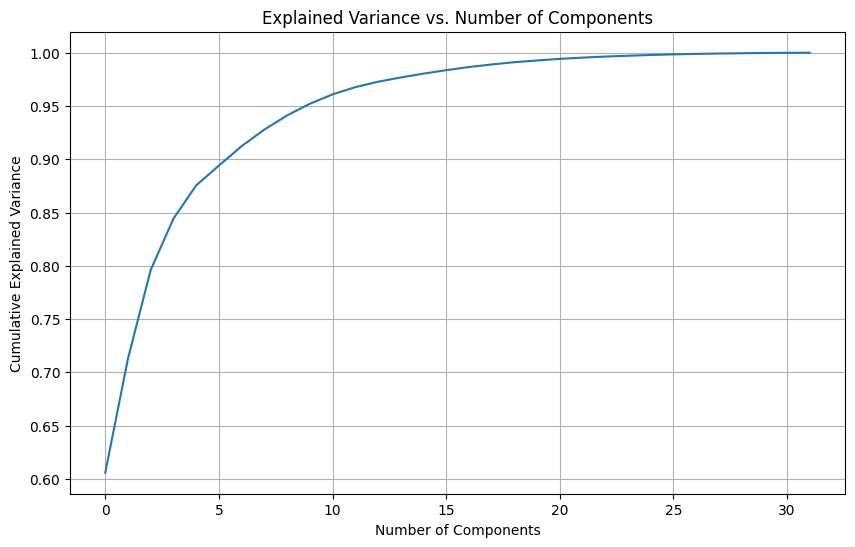

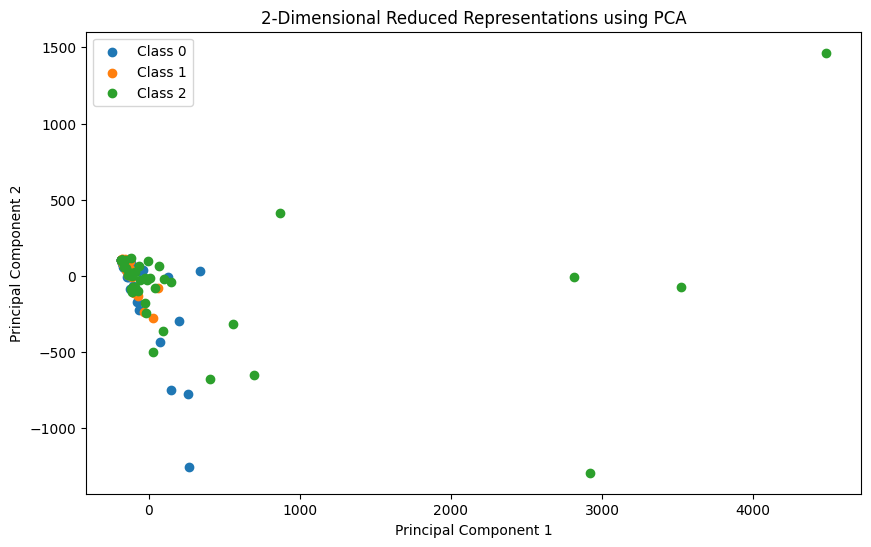

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to get eigenvalues and 2-dimensional reduced representations
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Plot 2-dimensional reduced representations
plt.figure(figsize=(10, 6))
for i in range(len(class_folders)):
    indices = np.where(y_train == i)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=f'Class {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-Dimensional Reduced Representations using PCA')
plt.legend()
plt.show()


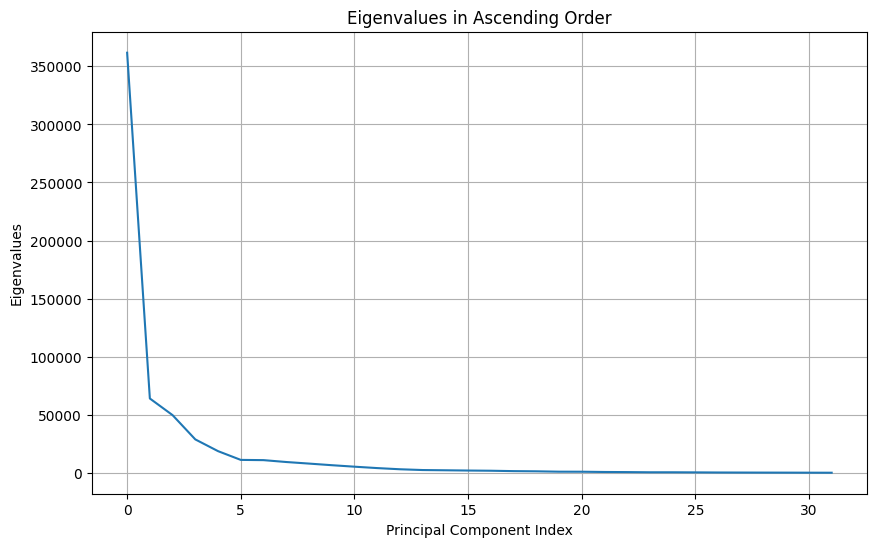

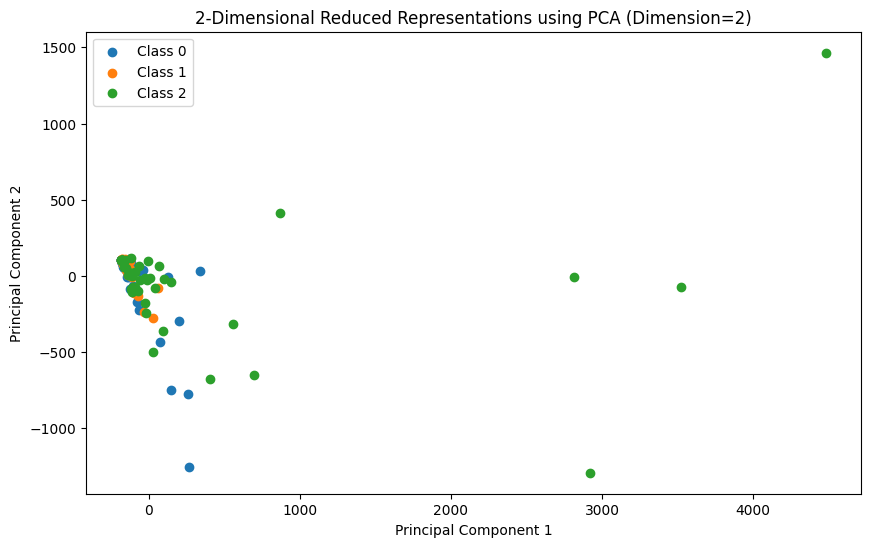

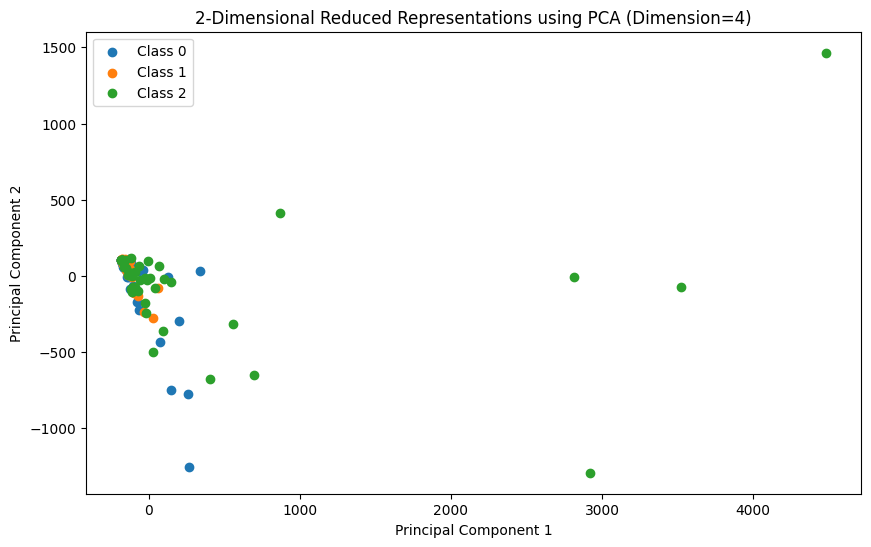

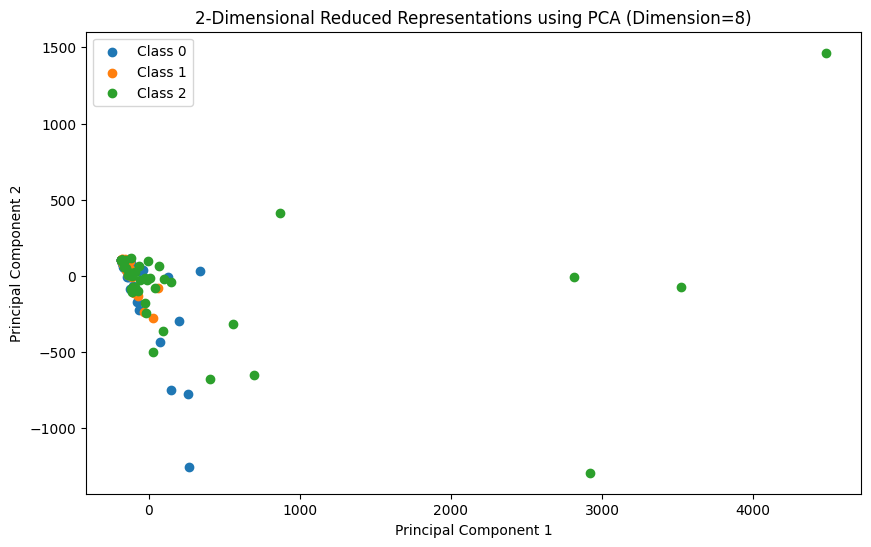

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load training data
# ... (your existing code)

# Perform PCA to get eigenvalues and 2-dimensional reduced representations for all dimensions
pca = PCA()
X_train_pca_all_dimensions = pca.fit_transform(X_train)

# Plot eigenvalues in ascending order
plt.figure(figsize=(10, 6))
plt.plot(np.sort(pca.explained_variance_)[::-1])
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues in Ascending Order')
plt.grid(True)
plt.show()

# Plot 2-dimensional reduced representations for all dimensions
dimensions = [1, 2, 4, 8]

for l in dimensions:
    pca_l = PCA(n_components=l)
    X_train_pca_l = pca_l.fit_transform(X_train)

    # Check if there are at least two components before plotting
    if l >= 2:
        plt.figure(figsize=(10, 6))
        for i in range(len(class_folders)):
            indices = np.where(y_train == i)
            plt.scatter(X_train_pca_l[indices, 0], X_train_pca_l[indices, 1], label=f'Class {i}')

        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'2-Dimensional Reduced Representations using PCA (Dimension={l})')
        plt.legend()
        plt.show()


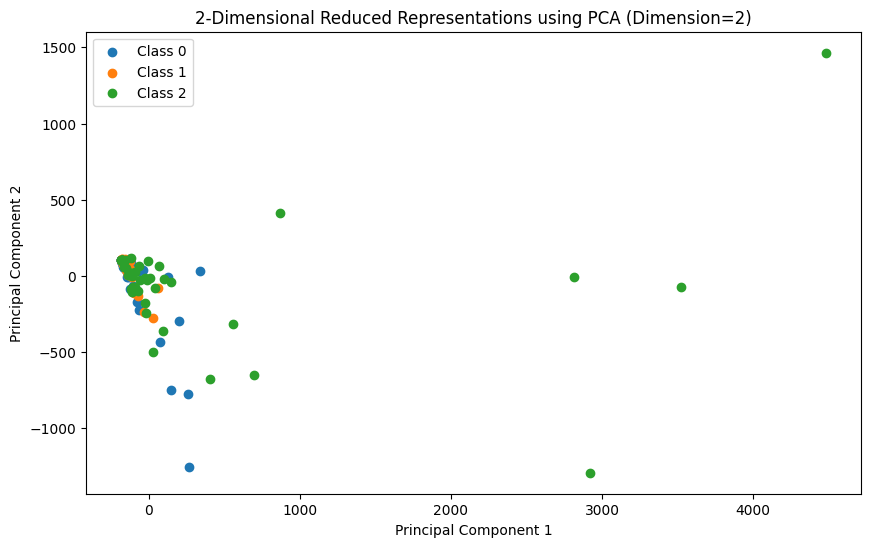

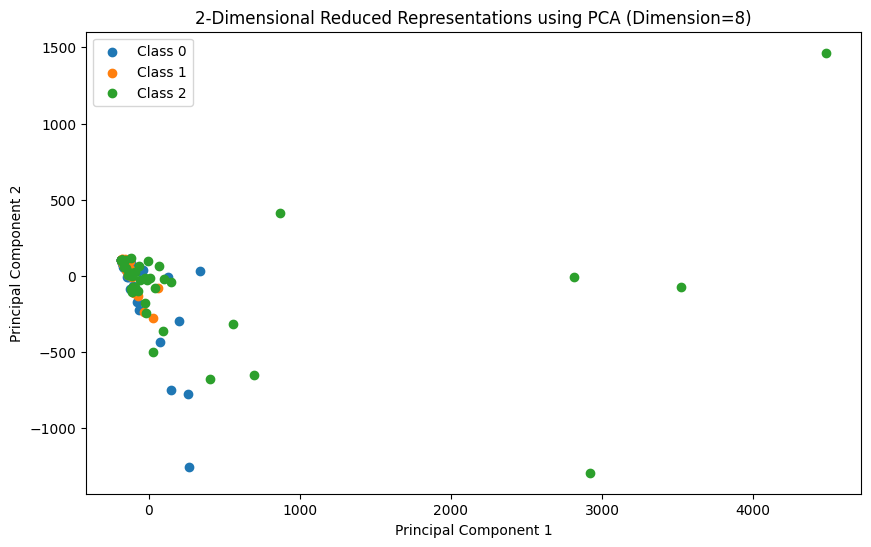

In [ ]:
# Define different values of l (including l=1)
dimensions = [1, 2, 4, 8]

# Perform PCA for each dimensionality
for l in dimensions:
    pca = PCA(n_components=l)
    X_train_pca = pca.fit_transform(X_train)

    # Plot 2-dimensional reduced representations for each dimensionality
    if l >= 2:
        plt.figure(figsize=(10, 6))
        for i in range(len(class_folders)):
            indices = np.where(y_train == i)
            plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=f'Class {i}')

        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'2-Dimensional Reduced Representations using PCA (Dimension={l})')
        plt.legend()
        plt.show()
